# Loading Packages and Data

In [1]:
#Basic Packages Most Python Data Analysis will Require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#This allows us for our matplotlib plots to show up as cell output.
#(without this the plots we make may show up as windows that popout)
%matplotlib inline
print("Inline Functionality Set")
print('Basic Packages Loaded')


Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Inline Functionality Set
Basic Packages Loaded


In [2]:
#Common Descriptive Analytics Algorithms we will demonstrate in this class
from sklearn.cluster import KMeans
'Descriptive Analytics Algorithms Loaded'

'Descriptive Analytics Algorithms Loaded'

In [3]:
#Load data
df=pd.read_csv('tripadvisor_review.csv',sep=',')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [4]:
categories=[' Average user feedback on \n art galleries',
' Average user feedback \n on dance clubs',
' Average user feedback on \n juice bars',
' Average user feedback on \n restaurants',
' Average user feedback on \n museums',
' Average user feedback on \n resorts',
' Average user feedback on \n parks/picnic spots',
' Average user feedback on \n beaches',
' Average user feedback on \n theaters',
' Average user feedback on \n religious institutions']

In [5]:
df.columns=['User ID']+categories

# One Dimensional Exploratory Data Analysis on Each Tourism Type

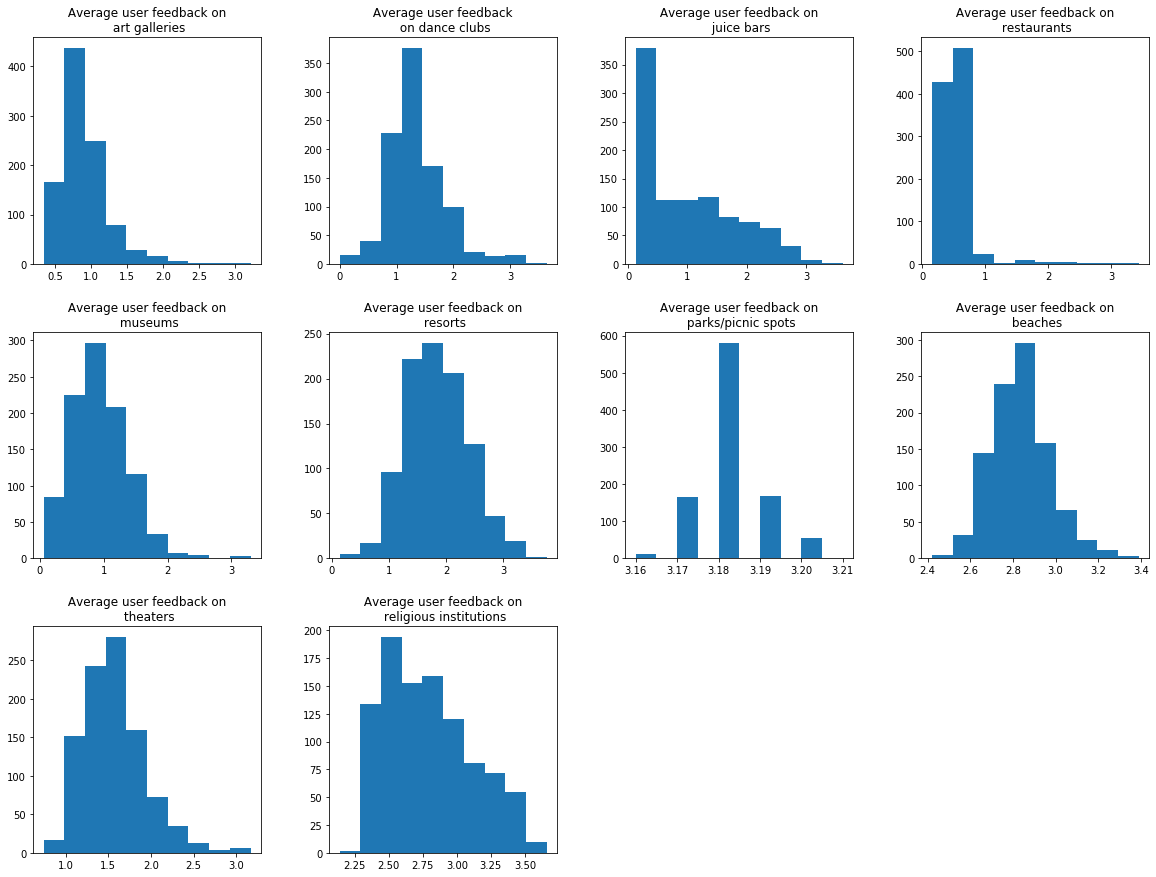

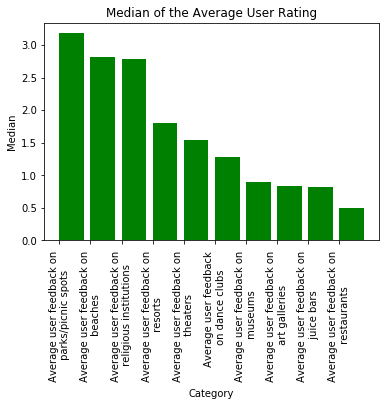

In [6]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 11):
    plt.subplot(3, 4, i)
    plt.hist(df[df.columns[i]])
    plt.title(categories[i-1])
plt.show()
med_list=[]
for i in range(1, 11):
    a=np.median(df[df.columns[i]])
    b=categories[i-1]
    med_list.append([b,a])
df_med=pd.DataFrame(med_list,columns=['Category','Median Average Rating']).\
        sort_values(['Median Average Rating'], ascending=False)
plt.bar(df_med['Category'],df_med['Median Average Rating'], color='green', align="edge")
plt.xticks(rotation=90)
plt.title('Median of the Average User Rating')
plt.ylabel('Median')
plt.xlabel('Category')
plt.show()

# Two Dimensional Exploratory Data Analysis (pairs of Tourism Types)

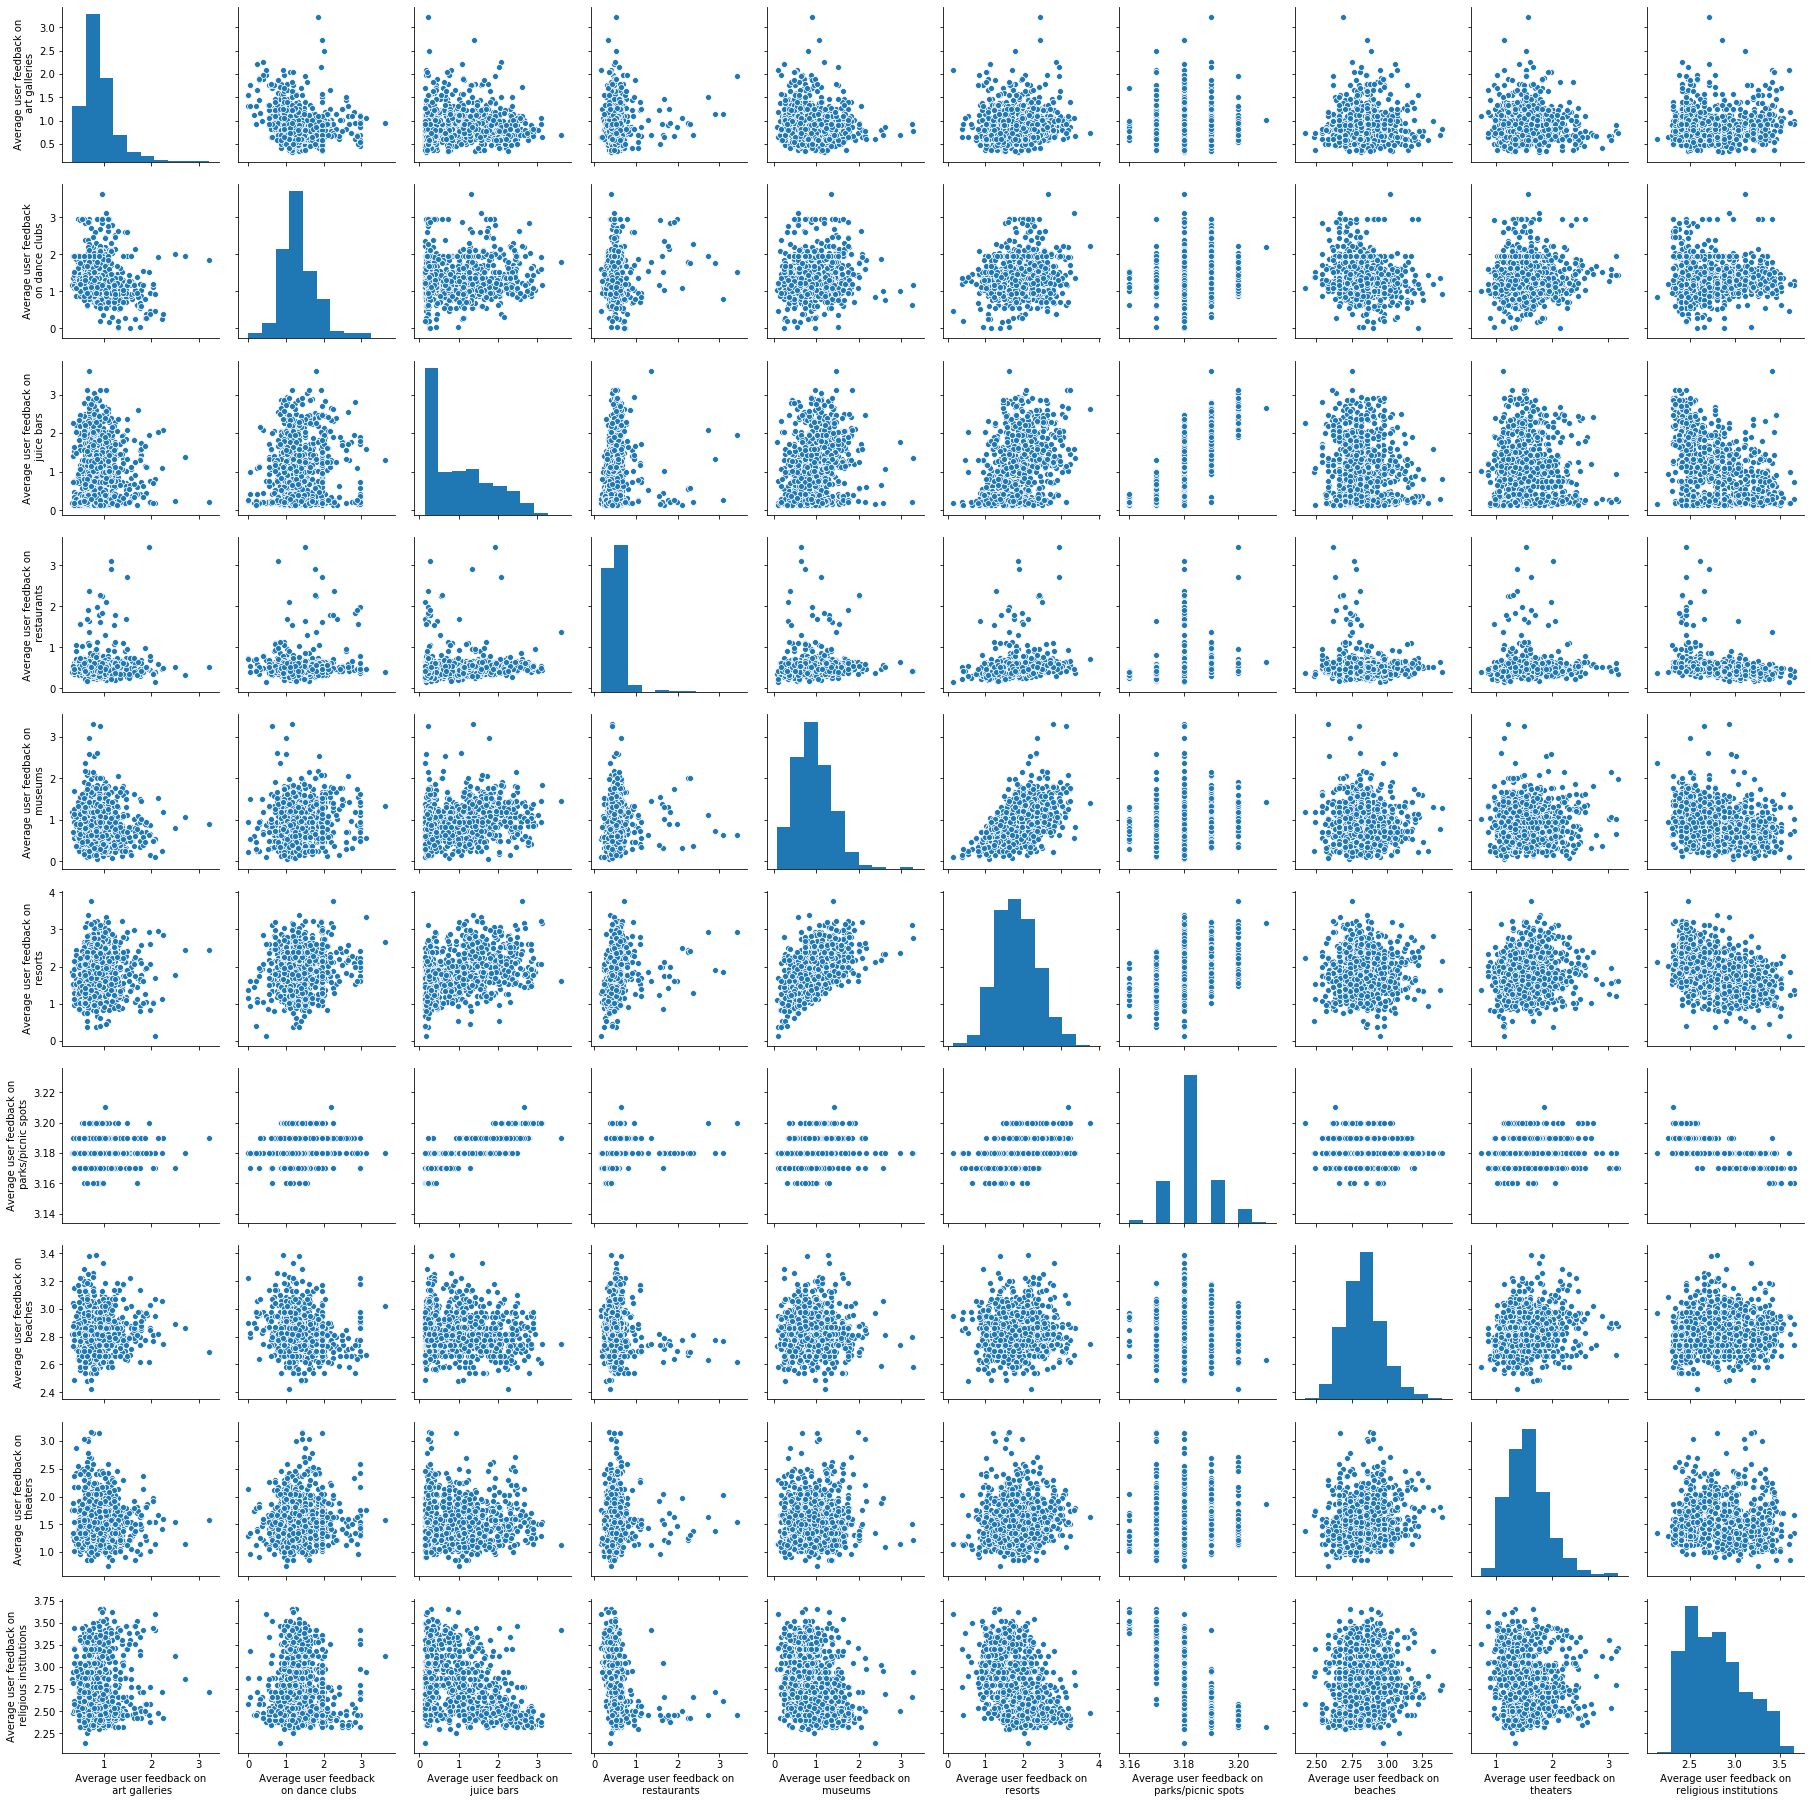

In [7]:
figout=sns.pairplot(df)
plt.savefig('figout.png')

# Clustering with K-means Algorithm (ie. Lloyd's Algorithm)

In [8]:
#Clustering the  data points into 3 clusters
kmeans=KMeans(n_clusters=3).fit(df[df.columns[1:len(df.columns)]])

In [9]:
#What are the cluster labels assigned?
df['predicted_cluster']=kmeans.labels_
df.head()

,User ID,Average user feedback on \n art galleries,Average user feedback \n on dance clubs,Average user feedback on \n juice bars,Average user feedback on \n restaurants,Average user feedback on \n museums,Average user feedback on \n resorts,Average user feedback on \n parks/picnic spots,Average user feedback on \n beaches,Average user feedback on \n theaters,Average user feedback on \n religious institutions,predicted_cluster
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


# The Elbow Method
- Is this data "clusterable?"
- What is the best number of clusters to ask for?

In [10]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    for i in range(0,3):
        sub_inertia_list=[]
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


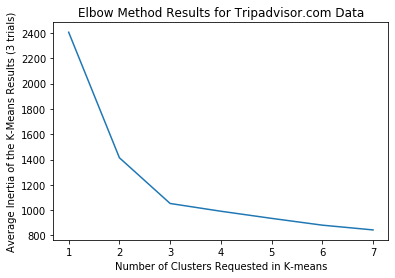

In [11]:
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Tripadvisor.com Data')
plt.show()

# Can we Determine Any Attributes (Characteristics from these 3 Clusters)?

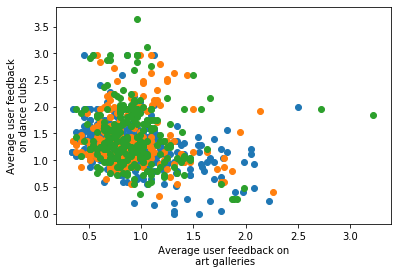

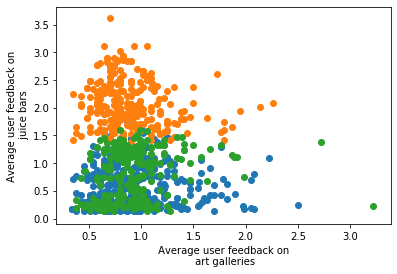

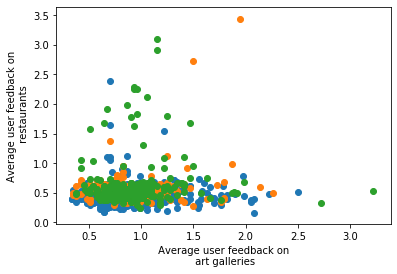

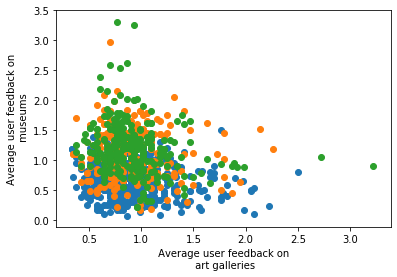

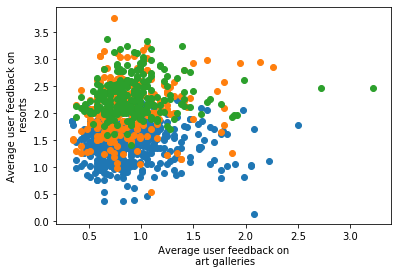

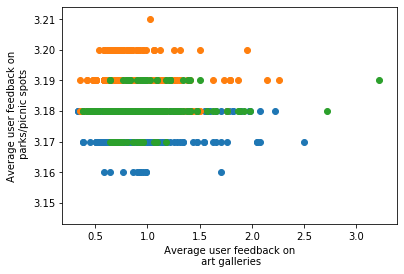

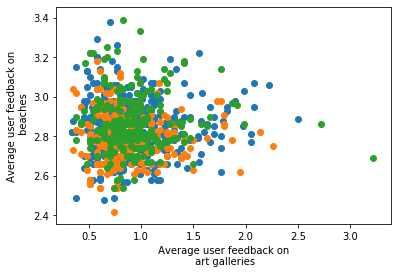

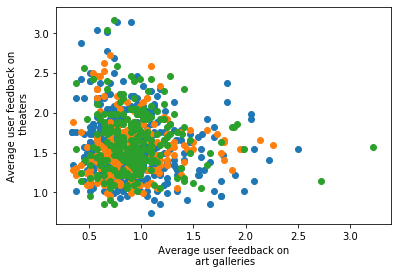

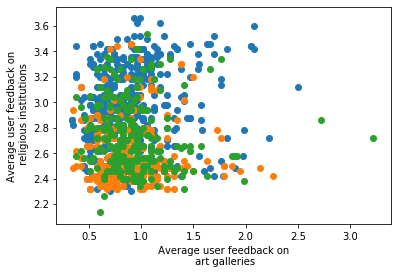

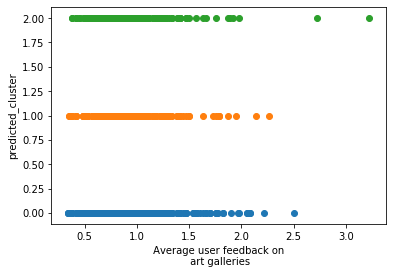

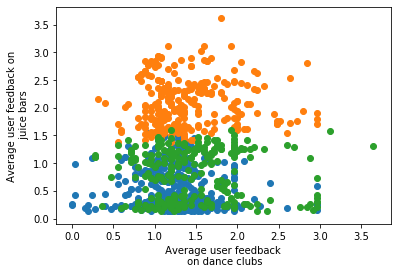

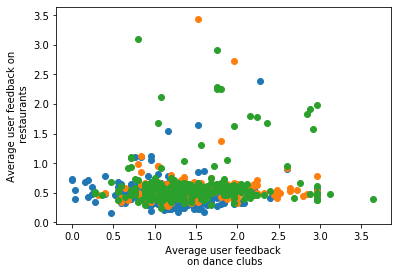

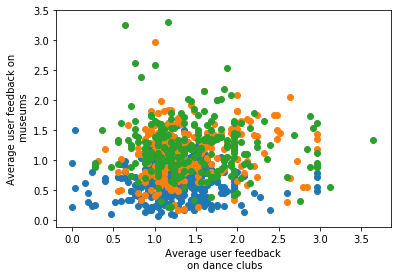

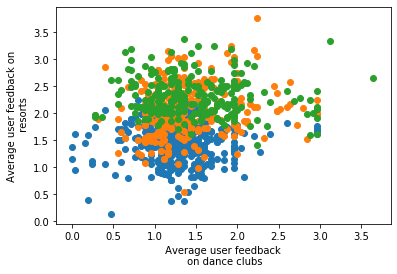

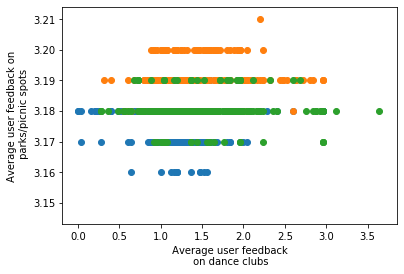

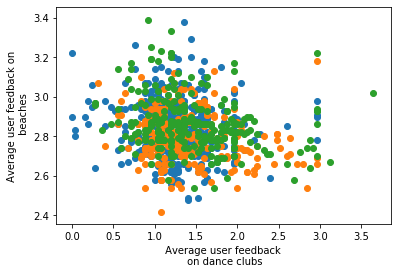

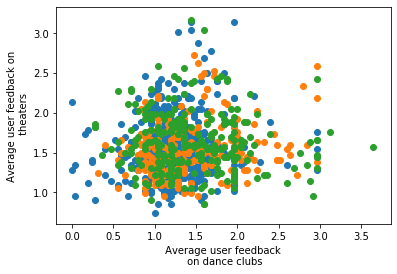

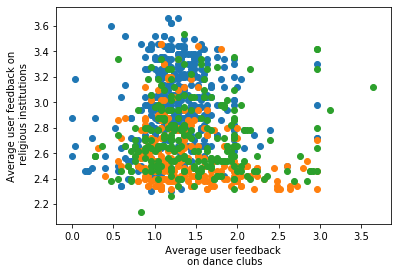

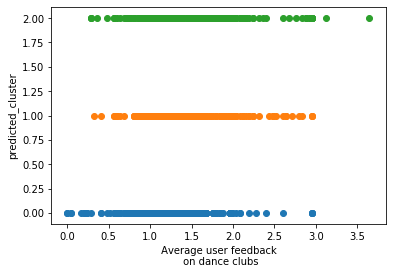

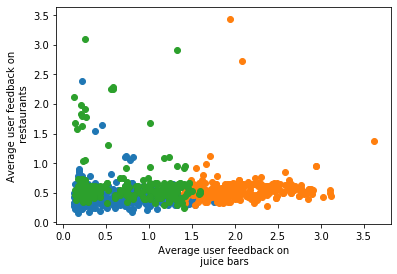

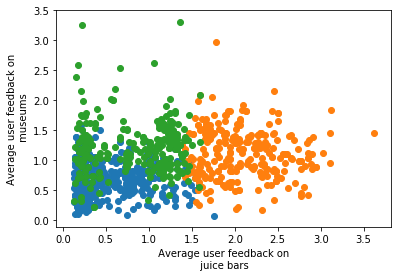

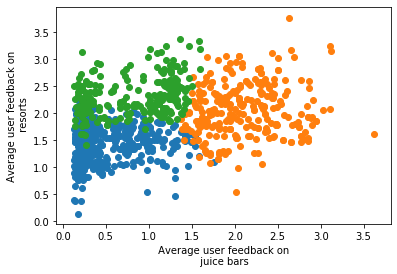

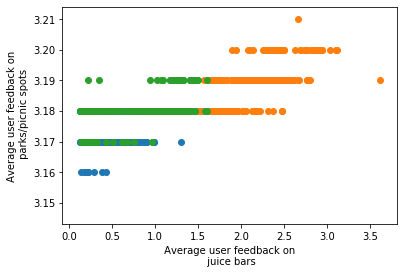

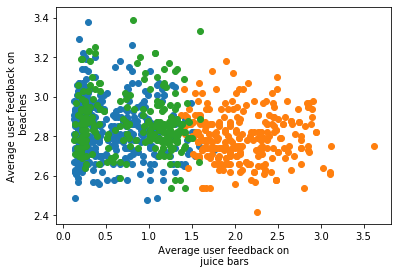

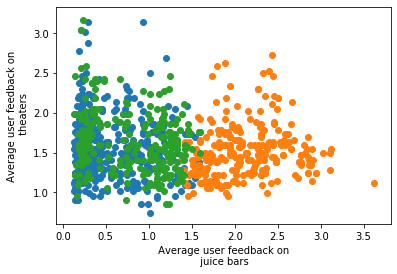

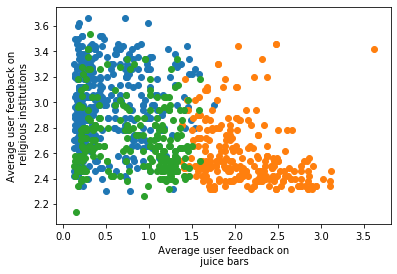

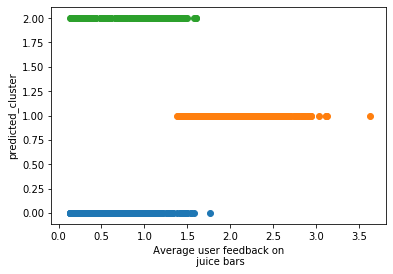

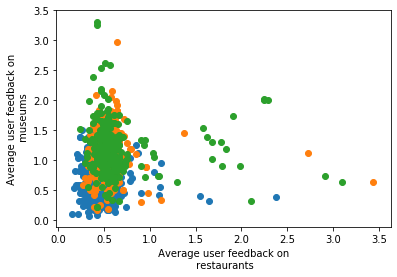

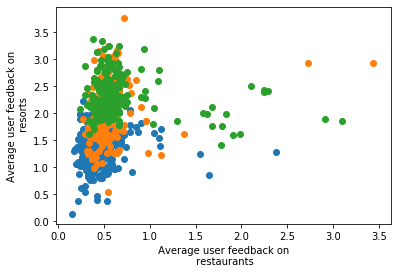

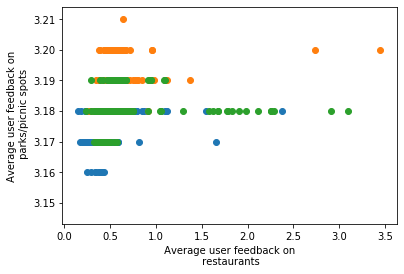

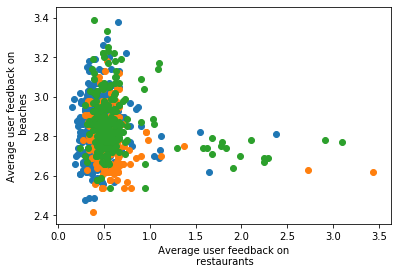

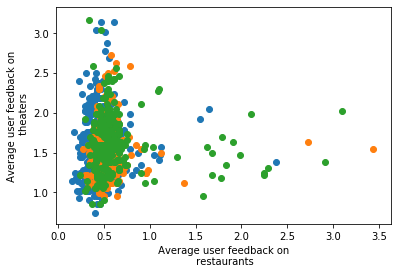

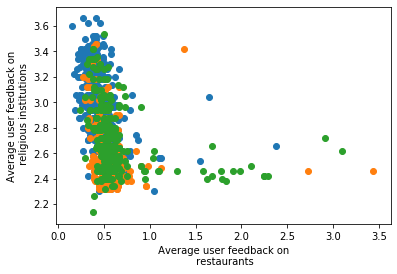

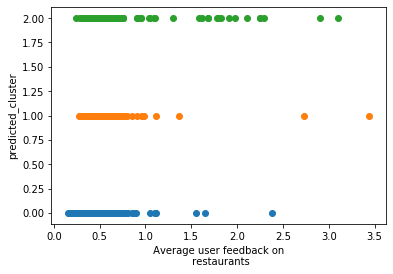

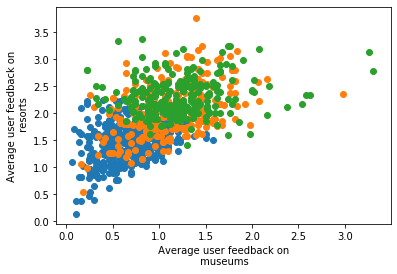

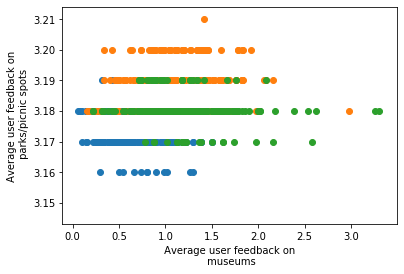

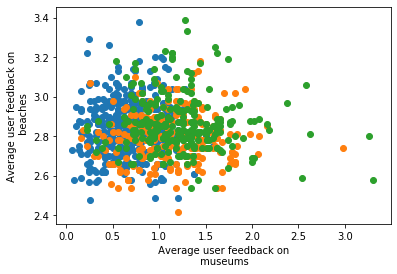

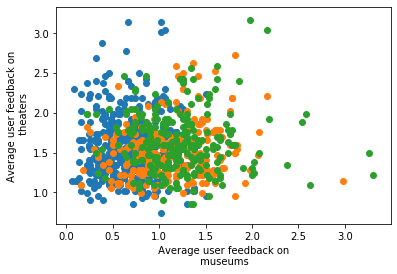

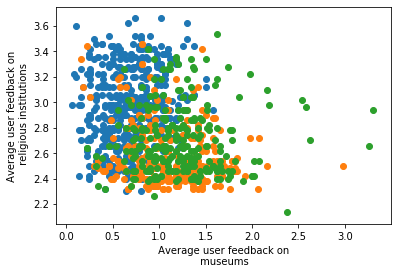

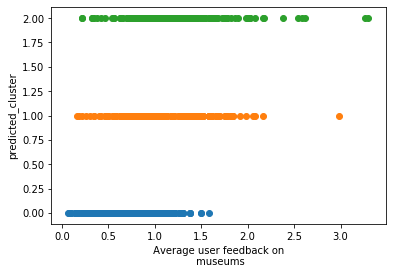

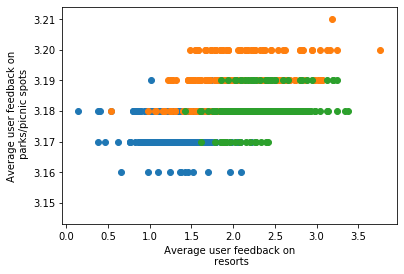

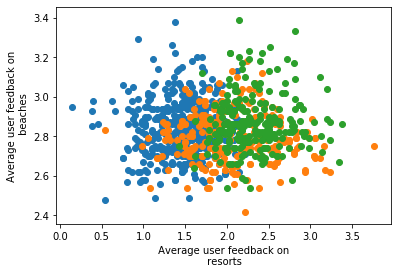

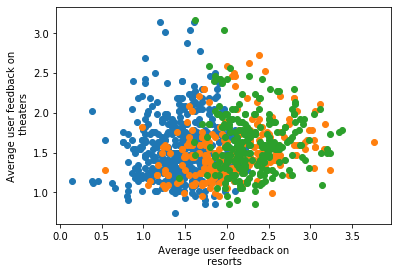

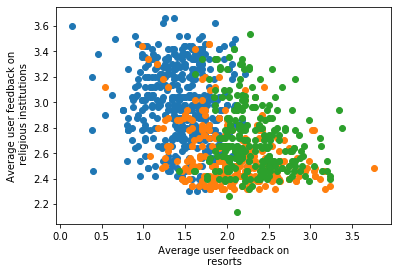

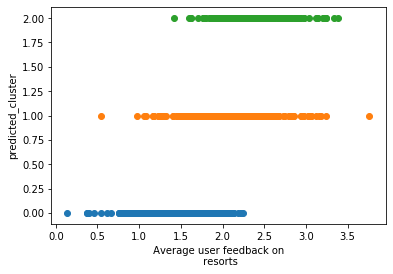

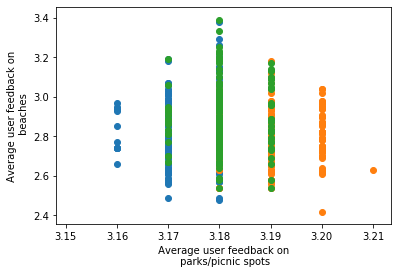

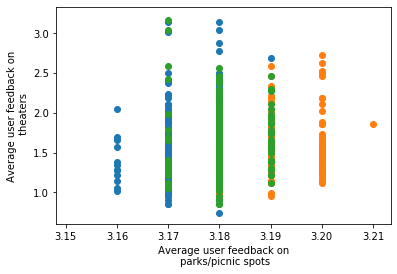

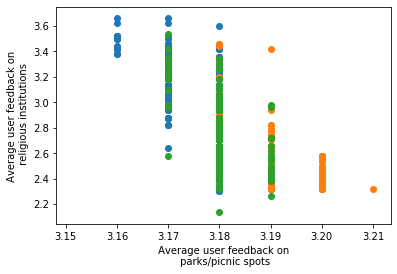

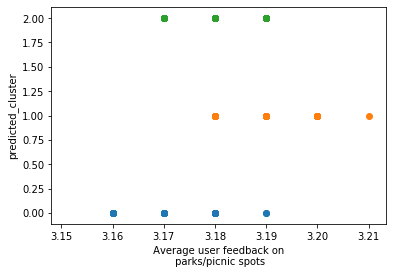

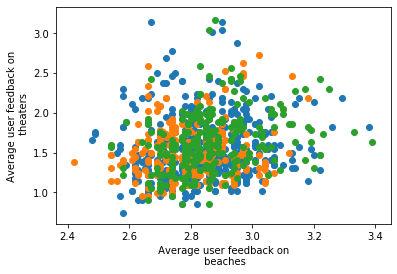

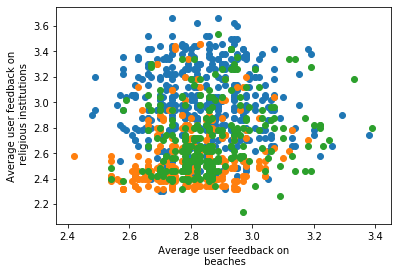

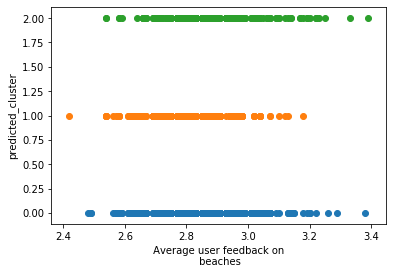

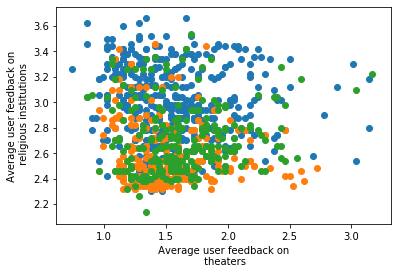

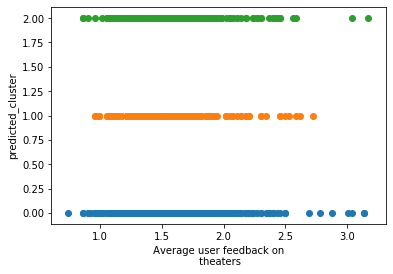

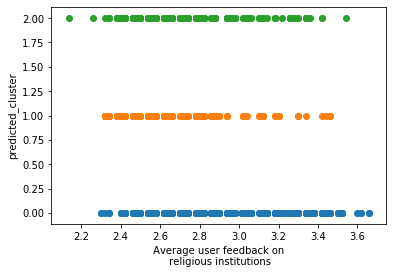

In [12]:
for i in range(1,len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        for k in range(0,3):
            plt.scatter(df[df.predicted_cluster==k][df.columns[i]], df[df.predicted_cluster==k][df.columns[j]])
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])
        plt.show()

In [13]:
df

,User ID,Average user feedback on \n art galleries,Average user feedback \n on dance clubs,Average user feedback on \n juice bars,Average user feedback on \n restaurants,Average user feedback on \n museums,Average user feedback on \n resorts,Average user feedback on \n parks/picnic spots,Average user feedback on \n beaches,Average user feedback on \n theaters,Average user feedback on \n religious institutions,predicted_cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2
...,...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,0
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,0
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,0
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,0


# What are some properties of k-means?

In [15]:
df_art=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/twenty.csv')
df_art.head()

,x,y,actual_cluster
0,0.067391,0.648651,0
1,0.184058,0.285643,0
2,0.216653,-0.626459,0
3,-0.230196,-0.277555,0
4,-0.343994,0.952639,0


In [18]:
#How many 'actual' clusters are there?
df_art['actual_cluster'].drop_duplicates()

0       0
50      1
100     2
150     3
200     4
250     5
300     6
350     7
400     8
450     9
500    10
550    11
600    12
650    13
700    14
750    15
800    16
850    17
900    18
950    19
Name: actual_cluster, dtype: int64

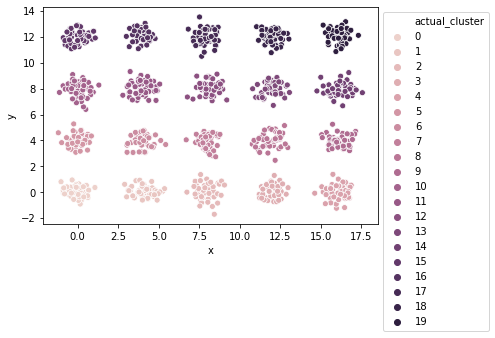

In [30]:
sns.scatterplot(x="x", y="y", hue='actual_cluster', data=df_art, legend='full')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

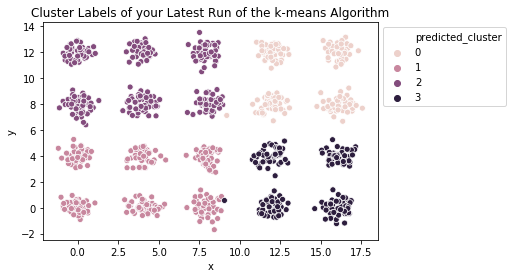

Inertia of your Latest Run of the k-means Algorithm
12496.41922983216


In [37]:
#Let's cluster the data using just 4 clusters
X=df_art[['x','y']]
kmeans=KMeans(n_clusters=4).fit(X)
df_art['predicted_cluster']=kmeans.labels_

#What are the results? compare them to the people in your breakout rooms.
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df_art, legend='full')
plt.title('Cluster Labels of your Latest Run of the k-means Algorithm')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('Inertia of your Latest Run of the k-means Algorithm')
print(kmeans.inertia_)

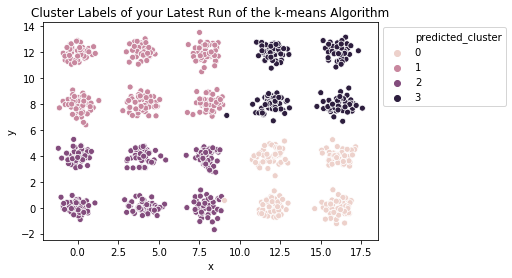

Inertia of your Latest Run of the k-means Algorithm
12496.41922983216


In [38]:
#Copy the exact same code that you had from above and run again, do you get the same results? Run the code multiple times.
X=df_art[['x','y']]
kmeans=KMeans(n_clusters=___).fit(X)
df_art['predicted_cluster']=kmeans.labels_

#What are the results? compare them to the people in your breakout rooms.
sns.scatterplot(x="x", y="y", hue='_________', data=df_art, legend='full')
plt.title('Cluster Labels of your Latest Run of the k-means Algorithm')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('Inertia of your Latest Run of the k-means Algorithm')
print(kmeans.inertia_)